# <center> Linear Regression</center>
##### -By Bakir Imen

##### In this notebook, we will be working on a 'Fuel Consumption and Carbon Dioxide Emission of cars' dataset and we will be considering the Regression model : Simple Linear Regression. The goal is to prepare the data for use in modelling and build, train and test our model using scikit-learn.

## Objectives :
#### -Visualisation and analysis of the data
#### -Uncover patterns and relationships in the data
#### -split our data into training and test sets
#### -create a model using training set
#### -evaluate the model using test set
#### -use the model to predict unkown value

## Data Exploration:

In [1]:
## Import Necessary libraries

## Preprocessing libraries
import pandas as pd #For data processing, manipulation and even a bit of visualization.
import numpy as np
## Visualization libraries
import seaborn as sns #For prettier visualization.
import matplotlib.pyplot as plt #For visualization.

### but before we dive into exploring and analyzing the data, first, we have to understand it  :

## Note :
the following cell is a detailed explanation of the DataSet which was conducted by AI club team members.

## Understanding the Data
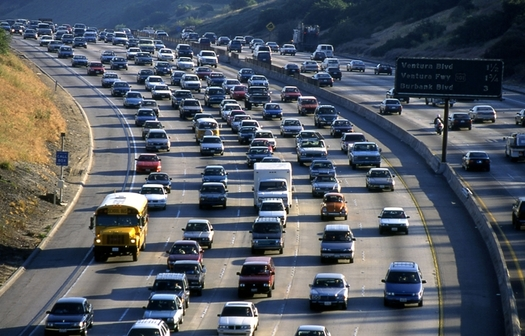

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014 : The year when the car was created.
- **MAKE** e.g. Acura : The brand of the vehicle
- **MODEL** e.g. ILX : Refers to the name of a car product and sometimes a range of products
- **VEHICLE CLASS** e.g. SUV : Car Body Style
- **ENGINE SIZE** e.g. 4.7 :  A larger engine is usually able to burn more fuel and produce more power.
- **CYLINDERS** e.g 6 (The cylinder is the power unit of the engine. This is where fuel is burned and converted into mechanical energy that powers the vehicle.)
- **TRANSMISSION** e.g. A6 : Type of the Vehicule 's gearbox.
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9 : Fuel consumption in city.
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9 (HHighway (abbreviated as HWY) is an English term for a public thoroughfare, often a main road or freeway.) 
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2 (Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%.)
- **MPG** : MPG, or miles per gallon, is the distance, measured in miles, that a car can travel per gallon of fuel. MPG is also the primary measurement of a car's fuel efficiency: The higher a car's MPG, the more fuel efficient it is.
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


### now let's get to work!

In [2]:
#Read the data :
#pandas.read_csv(filepath_or_buffer)
data=pd.read_csv('FuelConsumption.csv')
data
#Take a look at the dataset :

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


Now let's have our first step in data analysis!
## Data Exploration

In [3]:
#Generate descriptive statistics :
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


For numeric data the result will include :
##### Data.count : Counts the number of non-NA/null observations. 
##### Data.max : Maximum of the values in the object.
##### Data.min : Minimum of the values in the object.
##### Data.mean : Mean of the values.
##### Data.std : Standard deviation of the observations 
as well as
##### lower, 50 and upper percentiles. 
By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

For object data (expl: strings or timestamps), the result will include :
##### Data.count 
##### Data.unique: finds the unique values and returns them in order of appearance 
##### Data.top : returns most commun value 
##### Data.freq : returns the most common value’s frequency
Nb : Data = name of your dataset

In [4]:
#print some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
#Detect missing values:
data.isna().sum()
#we can also use isnull() or notnull() methods

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

##### In order to get accurate counts, we should check if there's any duplicates in our dataset

In [6]:
data.duplicated().sum()

0

##### if we want to drop duplicated values we can use the method :
data.drop_duplicates(inplace=True) 
##### inplace=True : assures that any changes will occur in the dataset itself and not in a copy.

In [7]:
#let's seperate the names of the categorical features from the numerical ones
#select the numerical features
data.select_dtypes(include=np.number).columns

Index(['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [8]:
#select the categorical features
data.select_dtypes(include=np.object).columns

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')

In [9]:
#print the unique values of the MAKE column
data['MAKE'].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [10]:
#if we want to select one car model : 
data[data['MAKE']=='AUDI']

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
19,2014,AUDI,A4,COMPACT,2.0,4,AV8,Z,9.9,7.4,8.8,32,202
20,2014,AUDI,A4 QUATTRO,COMPACT,2.0,4,AS8,Z,11.5,8.1,10.0,28,230
21,2014,AUDI,A4 QUATTRO,COMPACT,2.0,4,M6,Z,10.8,7.5,9.3,30,214
22,2014,AUDI,A5 CABRIOLET QUATTRO,SUBCOMPACT,2.0,4,AS8,Z,11.5,8.1,10.0,28,230
23,2014,AUDI,A5 QUATTRO,SUBCOMPACT,2.0,4,AS8,Z,11.5,8.1,10.0,28,230
24,2014,AUDI,A5 QUATTRO,SUBCOMPACT,2.0,4,M6,Z,10.8,7.5,9.3,30,214
25,2014,AUDI,A6 QUATTRO,MID-SIZE,2.0,4,AS8,Z,12.0,8.1,10.2,28,235
26,2014,AUDI,A6 QUATTRO,MID-SIZE,3.0,6,AS8,Z,12.8,8.6,10.9,26,251
27,2014,AUDI,A6 QUATTRO TDI CLEAN DIESEL,MID-SIZE,3.0,6,AS8,D,9.8,6.4,8.3,34,224
28,2014,AUDI,A7 QUATTRO,MID-SIZE,3.0,6,AS8,Z,13.1,8.8,11.2,25,258


## NB : 
#### today we also discovered a new tool that allows data scientists to understand a Pandas DataFrame with a few lines of code :
DataPrep.EDA

###### pip install --user dataprep

### moving on :
Lets select some features to explore more!

In [12]:
"""select the following columns in a dataframe 'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS' and print the first 
5 columns"""
my_list=['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
data1=data[my_list]
data1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


## Why Correlation Analysis is Important ?
`Correlation` is a statistical technique that can show whether and how strongly pairs of variables are related. For example, height and weight are related, taller people tend to be heavier than shorter people etc...
it can also lead to a greater understanding of your data.

In [13]:
#Print the correlation matrix :
data1=data.drop('MODELYEAR', inplace=False, axis=1)
data1.corr().style.background_gradient(cmap="Blues")
# we dropped the MODELYEAR row because it is constant
#if we keep it a warning occures and we will see nan values in the first row and column.

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


##### Positive Correlation: both variables change in the same direction.
##### Neutral Correlation: No relationship in the change of the variables.
##### Negative Correlation: variables change in opposite directions.

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

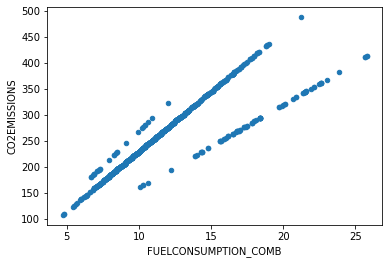

In [14]:
#visualise the relation between CO2EMISSIONS and FUELCONSUMPTION_COMB (hint: use scatterplot)
data.plot.scatter(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS')

### How to describe a scatterplot?
#### -Direction, Outliers, Form, Strength :
the relatioship between 'FUELCONSUMPTION_COMB' and 'CO2EMISSIONS' is positive but not strong and not linear : there are alot of outliers that fall off way below and above our linear model.
#### conclusion : theses two features are not correlated and won't help our model predict accurately.

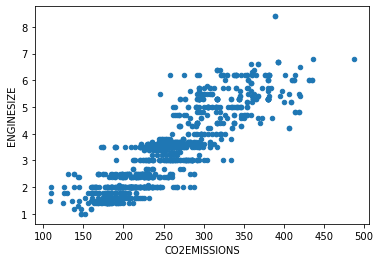

In [15]:
#visualise the relation between CO2EMISSIONS and ENGINESIZE (hint: use scatterplot)
data.plot.scatter(x='CO2EMISSIONS', y='ENGINESIZE')

the relatioship between 'ENGINESIZE' and 'CO2EMISSIONS' is positive and strong and moderately close to our linear model.
#### conclusion : theses two features are positively correlated and will help our model predict accurately.

### What is Regression Line?
The Regression line is a straight line that best fits the data.
such that the overall distance from the line to the points (variable values) plotted on a graph is the smallest. 
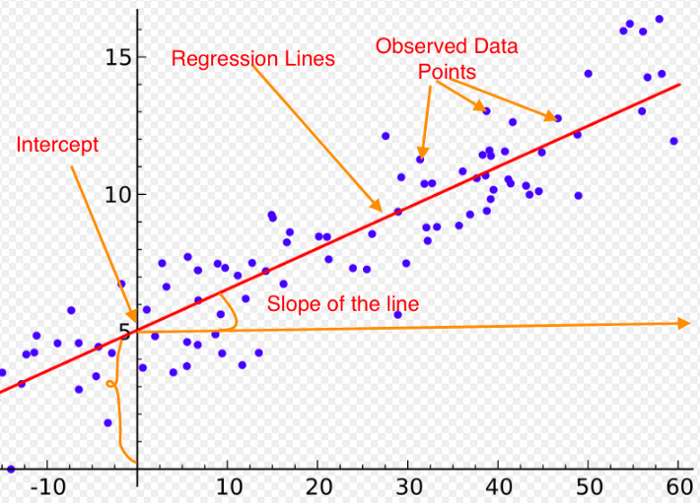

## Split data into features and target

In [16]:
#save the target in y variable and features in a variable called X
y= data['CO2EMISSIONS']
x= data.drop('CO2EMISSIONS' , axis=1)
x

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25


In [17]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [18]:
#print their shape
y.shape

(1067,)

In [19]:
x.shape

(1067, 12)

## what is Simple linear regression ?
Simple linear regression is an approach for predicting a response using a single feature.

## Train Test Split

It is important to split the data into two groups, training data and testing data, where:

- Training data always have larger number than testing data (70-30 / 80-20 split)
- Never train on test data

Make sure that your test set meets the following two conditions:
- Is large enough to yield statistically meaningful results.
- Is representative of the data set as a whole. In other words, don't pick a test set with different characteristics than the training set.
For more information: https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)
print("The training data has a shape of", x_train.shape, y_train.shape)
print("The testing data has a shape of", x_test.shape, y_test.shape)

The training data has a shape of (853, 12) (853,)
The testing data has a shape of (214, 12) (214,)


In [21]:
# select ENGINESIZE column :
x1_train=x_train[['ENGINESIZE']]

In [22]:
#create simple regression model :
from sklearn.linear_model import LinearRegression
Lr= LinearRegression()
#fitting Simple Regression to training set
Lr.fit(x1_train, y_train)

LinearRegression()

In [ ]:
#predecting the test set results :
y_pred = Lr.predict(x_test)

In [28]:
a=Lr.coef_
b=Lr.intercept_
a

array([39.18688018])

In [27]:
b

125.79671213969704